In [1]:
import numpy as np

In [2]:
#4章ネットワークの学習
#4.2.1二乗和誤差
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [3]:
t=[0,0,1,0,0,0,0,0,0,0]

In [4]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [5]:
#[2]を正解とする
t=[0,0,1,0,0,0,0,0,0,0]

In [6]:
#例1:[2]の確率が最も高い場合(0.6)
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [7]:
mean_squared_error(np.array(y),np.array(t))

0.097500000000000031

In [8]:
#4.2.2交差エントロピー誤差
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

In [9]:
t=[0,0,1,0,0,0,0,0,0,0]

In [10]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [11]:
cross_entropy_error(np.array(y),np.array(t))

2.3025840929945458

In [12]:
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [13]:
cross_entropy_error(np.array(y),np.array(t))

0.51082545709933802

In [14]:
#4.2.3ミニバッチ学習
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)

In [15]:
print(x_train.shape)#(60000,784)

(60000, 784)


In [16]:
print(t_train.shape)#(60000,10)

(60000, 10)


In [17]:
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size,batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

In [18]:
np.random.choice(60000,10)

array([37576, 16016, 58379, 59413,   953, 23659,  3591, 32723, 44035, 15248])

In [19]:
#4.4.4[バッチ対応版]交差エントロピー誤差の実装
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

In [20]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size),t]))/batch_size

In [21]:
#4.3.2数値微分の例
def function_l(x):
    return 0.01*x**2+0.1*x

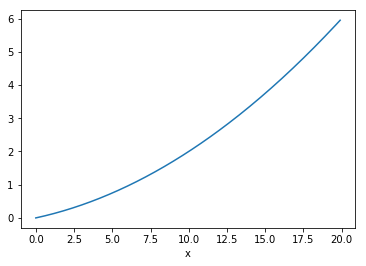

In [22]:
import numpy as np
import matplotlib.pylab as plt
x=np.arange(0.0,20.0,0.1)#0から20まで、0.1刻みのx配列
y=function_l(x)
plt.xlabel("x")
plt.plot(x,y)
plt.show()

In [23]:
def numerical_diff(f,x):
    h=1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

In [24]:
numerical_diff(function_l,5)

0.1999999999990898

In [25]:
numerical_diff(function_l,10)

0.2999999999986347

In [26]:
#4.3.3偏微分
def function_2(x):
    return x[0]**2+x[1]**2#またはreturn np.sum(x**2)

In [27]:
def function_tmp1(x0):
    return x0*x0+4.0**2.0

In [28]:
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [29]:
def function_tmp2(x1):
    return 3.0**2.0+x1*x1

In [30]:
numerical_diff(function_tmp2,4.0)

7.999999999999119

In [31]:
#4.4勾配
def numerical_gradient(f,x):
    h=1e-4#0.0001
    grad=np.zeros_like(x)#xと同じ形状の配列を生成
    for idx in range(x.size):
        tmp_val=x[idx]
        #f(x+h)の計算
        x[idx]=tmp_val+h
        fxh1=f(x)
        #f(x-h)の計算
        x[idx]=tmp_val-h
        fxh2=f(x)
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val#値を元に戻す
    return grad

In [32]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([ 6.,  8.])

In [33]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([ 0.,  4.])

In [34]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([ 6.,  0.])

In [35]:
#4.4.1勾配法
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x

In [36]:
def function_2(x):
    return x[0]**2+x[1]**2

In [37]:
init_x=np.array([-3.0,4.0])

In [38]:
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [39]:
#学習率が大きすぎる例:lr=10.0
init_x=np.array([-3.0,4.0])

In [40]:
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [41]:
init_x=np.array([-3.0,4.0])

In [42]:
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

In [43]:
#4.4.2ニューラルネットワークに対する勾配
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient

In [44]:
class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3) #ガウス分布で初期化
        
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)
        
        return loss

In [45]:
net=simpleNet()

In [46]:
print(net.W)

[[ 0.27245429  0.33704989 -0.14892135]
 [-0.05863298  0.96800575 -1.29297346]]


In [47]:
x=np.array([0.6,0.9])

In [48]:
p=net.predict(x)

In [49]:
print(p)

[ 0.11070289  1.07343511 -1.25302892]


In [52]:
np.argmax(p)#最大値のインデックス

1

In [53]:
t=np.array([0,0,1])#正解ラベル

In [54]:
net.loss(x,t)

2.7181604908243

In [55]:
def f(W):
    return net.loss(x,t)

In [57]:
dW=numerical_gradient(f,net.W)

In [58]:
print(dW)

[[ 0.15485682  0.40554555 -0.56040237]
 [ 0.23228524  0.60831832 -0.84060356]]


In [59]:
f=lambda w: net.loss(x,t)

In [60]:
dW=numerical_gradient(f,net.W)

In [61]:
#4.5学習アルゴリズムの実装
#4.5.1二層ニューラルネットワークのクラス
import sys,os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [81]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        #重みの初期化
        self.params={}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
        
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        return y
    
    #x:入力データ、t:教師データ
    def loss(self,x,t):
        y=self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)
        accuracy=np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    #x:入力データ, t:教師データ
    def numerical_gradient(self,x,t):
        loss_W=lambda W:self.loss(x,t)
        grads={}
        grads['W1']=numerical_gradient(loss_W,self.params['W1'])
        grads['b1']=numerical_gradient(loss_W,self.params['b1'])
        grads['W2']=numerical_gradient(loss_W,self.params['W2'])
        grads['b2']=numerical_gradient(loss_W,self.params['b2'])
        return grads

In [63]:
net=TwoLayerNet(input_size=784,hidden_size=100,output_size=10)

In [64]:
net.params['W1'].shape #(784,100)

(784, 100)

In [65]:
net.params['b1'].shape #(100,)

(100,)

In [66]:
net.params['W2'].shape #(100,10)

(100, 10)

In [67]:
net.params['b2'].shape #(10,)

(10,)

In [68]:
x=np.random.rand(100,784)#ダミーの入力データ(100枚分)

In [69]:
t=np.random.rand(100,10)#ダミーの正解ラベル(100枚分)

In [75]:
grads=net.numerical_gradient(x,t)#勾配を計算

In [76]:
grads['W1'].shape #(784,100)

(784, 100)

In [77]:
grads['b1'].shape #(100,)

(100,)

In [78]:
grads['W2'].shape #(100,10)

(100, 10)

In [79]:
grads['b2'].shape #(10,)

(10,)

In [82]:
#4.5.2ミニバッチ学習の実装
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

ModuleNotFoundError: No module named 'two_layer_net'

In [83]:
(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)

In [84]:
grain_loss_list=[]
#ハイパーパラメータ
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1
network=TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

In [ ]:
for i in range(iters_num):
    #ミニバッチの取得
    batch_mask=np.random.choice(train_size,batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    #勾配の計算
    grad=network.numerical_gradient(x_batch,t_batch)
    #grad=network.gradient(x_batch,t_batch)#高速版
    
    #パラメータの更新
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
        
    #額主経過の記録
    loss=network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
        

In [87]:
#4.5.3テストデータで評価
import numpy as np 
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

ModuleNotFoundError: No module named 'two_layer_net'

In [89]:
(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]
#1エポック当たりの繰り返し数
iter_per_epoch=max(train_size/batch_size,1)

#ハイパーパラメータ
iters_num=10000
batch_size=100
learning_rate=0.1

network=TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

In [ ]:
for i in range(iters_num):
    #ミニバッチの取得
    batch_mask=np.random.choice(train_size,batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    
    #勾配の計算
    grad=network.numerical_gradient(x_batch,t_batch)
    #grad=network.gradient(x_batch,t_batch)#高速版！
    
    #パラメータの更新
    for key in ('W1','b1','W2','b2'):
        network.params[key]-=learning_rate*grad[key]
        
    loss=network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    #1エポック事に認識精度を計算
    if i % iter_per_epoch==0:
        train_acc=network.accuracy(x_train,t_train)
        test_acc=network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc,test acc | " + str(train_acc) + ", " + str(test_acc))

train acc,test acc | 0.0986333333333, 0.0958
